# IS590PR Session 11
### This demonstrates some common probability distributions using the Numpy random library. These can be useful in Monte Carlo simulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Simulate rolling one fair 6-sided die a few times.  This is a 'uniform discrete distribution':

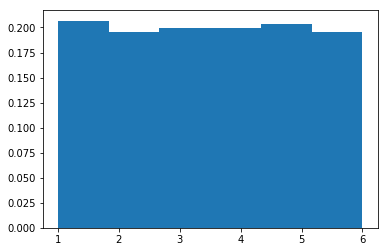

In [40]:
uniform = plt.hist(np.random.choice(range(1, 7), 10000), 
             bins=6,
             density=True)
plt.show()


### Uniform _continuous_ distribution from 1-6:

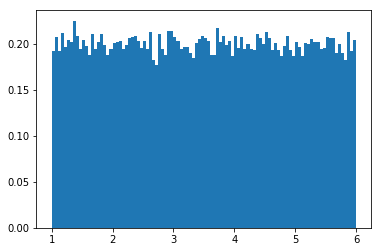

In [43]:
uniform = plt.hist(np.random.uniform(1, 6, 50000), 
             bins=100,
             density=True)
plt.show()


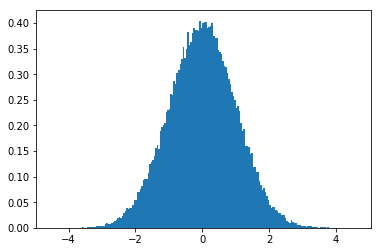

In [9]:
# Normal or Gaussian distribution.  a.k.a "bell curve"
normal = plt.hist(np.random.normal(loc=0, scale=1, size=100000), 
             bins=200,
             density=True)
plt.show()


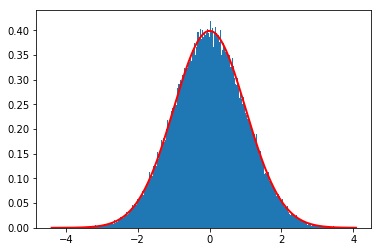

In [10]:
# Normal distribution again, with theoretical curve overlaid

mean = 0
std_dev = 1
n = np.random.normal(loc=mean, scale=std_dev, size=100000)

count, bins, ignored = plt.hist(n, 300, density=True)
plt.plot(bins, 1/(std_dev * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mean)**2 / (2 * std_dev**2) ),
          linewidth=2, color='r')
plt.show()

In [ ]:
# Triangular distribution.  
tri = plt.hist(np.random.triangular(0.2, 2, 8, 100000), 
             bins=200, density=True)
plt.show()


In [ ]:
# Beta distribution.  
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.beta.html#numpy.random.beta
# http://blog.josephmisiti.com/the-beta-distribution

beta = plt.hist(np.random.beta(1.8, 4, 1000000), 
             bins=200,
             density=True)
plt.show()


## The PERT & Modified PERT random distribution function.
The function below is accurate for PERT and also has the optional benefit of the "Modified PERT" which allows adjusting our level of confidence in the mode.

In [33]:
def mod_pert_random(low, likely, high, confidence=4, samples=10000):
    """Produce random numbers according to the 'Modified PERT' 
    distribution. 
    
    :param low: The lowest value expected as possible.
    :param likely: The 'most likely' value, statistically, the mode.
    :param high: The highest value expected as possible.
    :param confidence: This is typically called 'lambda' in literature 
                        about the Modified PERT distribution. The value
                        4 here matches the standard PERT curve. Higher
                        values indicate higher confidence in the mode.
                        Currently allows values 1-18
                        
    Formulas from "Modified Pert Simulation" by Paulo Buchsbaum.
    """
    # Check minimum & maximum confidence levels to allow:
    if confidence < 1 or confidence > 18:
        raise ValueError('confidence value must be in range 1-18.')
        
    mean = (low + confidence * likely + high)/(confidence + 2)

    a = (mean - low)/(high - low) * (confidence + 2)
    b = ((confidence + 1) * high - low - confidence * likely) / (high - low)
    
    beta = np.random.beta(a, b, samples)
    beta = beta * (high - low) + low
    return beta

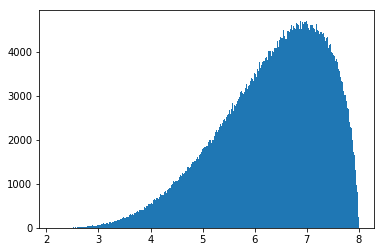

In [34]:
p = plt.hist(mod_pert_random(2, 7, 8, samples=1000000), 
             bins=500,
             density=False)
plt.show()

### Notice that even when symmetrical, the PERT distribution is "rounder" than a Normal curve, and that the extreme high & low values are defined:

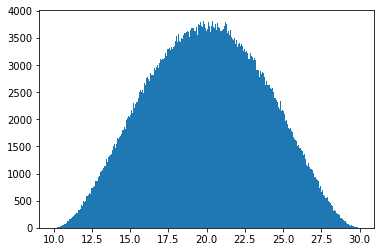

In [35]:
p = plt.hist(mod_pert_random(10, 20, 30, samples=1000000), 
             bins=500,
             density=False)
plt.show()

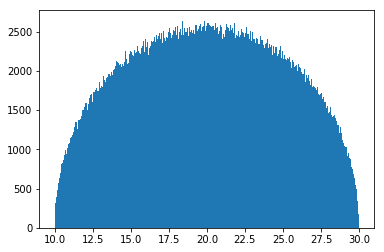

In [36]:
# Same estimates as above, but with very low confidence in the mode:
p = plt.hist(mod_pert_random(10, 20, 30, confidence=1, samples=1000000), 
             bins=500,
             density=False)
plt.show()

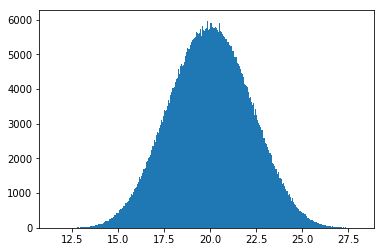

In [37]:
# Same estimates as above, but with higher 'confidence' in the mode:
p = plt.hist(mod_pert_random(10, 20, 30, confidence=18, samples=1000000), 
             bins=500,
             density=False)
plt.show()

## Notice that combining two or more random variables often does not produce an intuitive distribution!

That's partly why we need the Monte Carlo simulation technique.  Especially in cases where there are combinations of non-random factors along with uncertainties within a system, we often can't directly derive the resulting probabilities without a simulation.

### Example, throwing a fair 1-sided die is uniform discrete, as shown at the top.  So what is the probability distribution of the _sum of two_ 6-sided dice, like we have in many board games?  It's easy enough to figure this out on paper but here's the computational result:

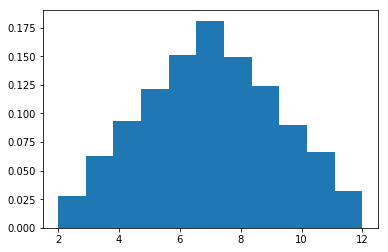

In [45]:
first_die  = np.random.choice(range(1, 7), 10000)
second_die = np.random.choice(range(1, 7), 10000)

two_dice_added = plt.hist(first_die + second_die, 
                 bins=11,
                 density=True)
plt.show()

Weird!  Adding two identical uniforms like this produced a _symmetric triangular_ distribution

So, what about 3 dice?  Will that still be triangular? ...

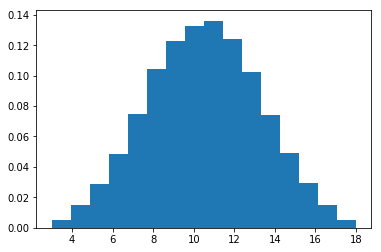

In [51]:
first_die  = np.random.choice(range(1, 7), 100000)
second_die = np.random.choice(range(1, 7), 100000)
third_die  = np.random.choice(range(1, 7), 100000)

three_dice_added = plt.hist(first_die + second_die + third_die, 
        bins=16,
        density=True)
plt.show()

No, it's now got a sort of "bell curve" shape. It's still symmetrical also, but it's not technically the same as a normal curve.